# **Cole Embleton's Notebook**

## **The Metric**

#### The metric I chose to evaluate Pittsburgh's best neighborhood was crime rate. Specifically, I looked at the police arrest data set based on neighborhood. My initial approach was to see which neighborhood had the least appearances in the data set, i.e. the neighborhood with the least number of arrests.

In [1]:
import pandas as pd

police = pd.read_csv("policearrest.tsv", sep="\t")
police.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [2]:
police.groupby("INCIDENTNEIGHBORHOOD").count()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,,,
Allegheny Center,1227,1227,1227,1221,1227,1227,1227,1227,1227,1227,1227,1227,888,888,914,914
Allegheny West,127,127,127,126,127,127,127,127,127,127,127,127,109,109,109,109
Allentown,930,930,930,923,930,930,930,930,930,930,930,930,865,865,876,876
Arlington,302,302,302,301,302,302,302,302,302,302,302,302,282,282,287,287
Arlington Heights,153,153,153,153,153,153,153,153,153,153,153,153,129,129,129,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,187,187,187,186,187,187,187,187,187,187,187,187,158,158,158,158
West End,280,280,280,280,280,280,280,280,280,280,280,280,220,220,221,221
West Oakland,311,311,311,310,311,311,311,311,311,311,311,311,260,260,262,262


#### These are the top 10 neighborhoods with the highest number of arrests, and the top 10 neighborhoods with the lowest number of arrests. Its noteable that some neighborhoods from the data set have very little arrests, specifically Mt. Oliver and Troy Hill-Herrs Island with single digit values.

In [3]:
police['INCIDENTNEIGHBORHOOD'].value_counts().head(10)

Central Business District    4238
South Side Flats             3377
Carrick                      2297
East Allegheny               2153
Homewood South               2044
Homewood North               1931
East Liberty                 1848
Marshall-Shadeland           1489
Bluff                        1458
Mount Washington             1413
Name: INCIDENTNEIGHBORHOOD, dtype: int64

In [4]:
police['INCIDENTNEIGHBORHOOD'].value_counts().tail(10)

East Carnegie              48
Chartiers City             44
Swisshelm Park             42
New Homestead              39
Ridgemont                  37
Regent Square              36
Central Northside          23
Mt. Oliver Boro            18
Troy Hill-Herrs Island      6
Mt. Oliver Neighborhood     2
Name: INCIDENTNEIGHBORHOOD, dtype: int64

In [5]:
incidents = pd.DataFrame(police['INCIDENTNEIGHBORHOOD'].value_counts().tail(10))
incidents.rename(columns = {'INCIDENTNEIGHBORHOOD':'Arrests'}, inplace = True)
incidents

,Arrests
East Carnegie,48
Chartiers City,44
Swisshelm Park,42
New Homestead,39
Ridgemont,37
Regent Square,36
Central Northside,23
Mt. Oliver Boro,18
Troy Hill-Herrs Island,6
Mt. Oliver Neighborhood,2


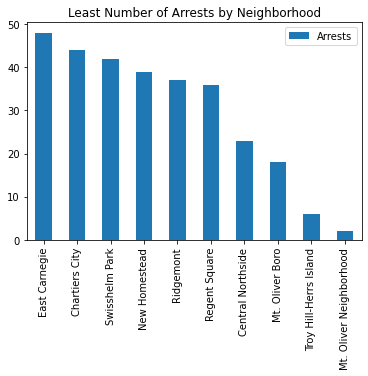

In [6]:
incidents.plot(kind='bar', title = 'Least Number of Arrests by Neighborhood')



#### Based on the bar graph above, the arrest data shows that Mt. Oliver has the least amount of arrests (2), overall. While this could imply that Mt. Oliver is the safest neighborhood of the data set, there are several other factors that could have lead to a lower incidence rate. Specifically, according to the United States Census Bereua, Mt. Oliver has a population of 3,340. Since this neighborhood has a relatively low population, it could be infered that this factor may correlate with a lower crime rate. 

#### To account for lower populated neighborhoods, I further evaluated the data set, specifically looking at neighborhoods that exceeded a population of 6,000. This is because the more seperated the populations are between compared neighborhoods, the greater the margin is for outliers.



In [7]:
print(police["INCIDENTNEIGHBORHOOD"].unique())

['Bloomfield' 'Outside City' 'Westwood' 'East Allegheny' 'Crafton Heights'
 'Greenfield' 'Brookline' 'Regent Square' 'East Liberty' nan 'East Hills'
 'Carrick' 'Allegheny Center' 'South Side Flats' 'Sheraden'
 'East Carnegie' 'Golden Triangle/Civic Arena' 'Point Breeze North'
 'Perry South' 'Allentown' 'North Shore' 'Marshall-Shadeland'
 'Central Oakland' 'Middle Hill' 'Strip District'
 'Lincoln-Lemington-Belmar' 'Central Northside' 'Troy Hill-Herrs Island'
 'Highland Park' 'Homewood North' 'Northview Heights' 'Brighton Heights'
 'Hazelwood' 'Perry North' 'Bedford Dwellings' 'Elliott' 'Beechview'
 'Fineview' 'Glen Hazel' 'Spring Hill-City View' 'Bluff' 'Manchester'
 'Homewood West' 'Outside County' 'Point Breeze' 'Homewood South'
 'Squirrel Hill South' 'Terrace Village' 'Upper Lawrenceville' 'Arlington'
 'South Side Slopes' 'Lower Lawrenceville' 'Garfield' 'Lincoln Place'
 'Larimer' 'Mount Washington' 'California-Kirkbride' 'Banksville'
 'Bon Air' 'South Shore' 'Beltzhoover' 'Knoxville

Populations taken from https://www.census.gov/glossary/#term_Populationestimates
(values that were not near 6,000 were rounded for simplicity)

- Bloomfield 8k
- Outside City n/a
- Westwood  3k
- East Allegheny 2k  
- Crafton Heights 3.8k
- Greenfield 7k
- Brookline 13k
- Regent Square 900 
- East Liberty 5.8k
- East Hills 3k
- Carrick 10k
- Allegheny Center 900
- South Side Flats 5.7k
- Sheraden 5.2k
- East Carnegie 570
- Golden Triangle/Civic Arena 5.2k
- Point Breeze North 5.3k
- Perry South  4k
- Allentown 2.5k
- North Shore 300
- Marshall-Shadeland 6k 
- Central Oakland 4k
- Middle Hill 1k
- Strip District 600
- Lincoln-Lemington-Belmar 4k
- Central Northside 2k
- Troy Hill-Herrs Island 2k 
- Highland Park  6k
- Homewood North 2k
- Northview Heights 1k
- Brighton Heights 7k
- Hazelwood 4k
- Perry North 4k
- Bedford Dwellings 1k
- Elliott 2k
- Beechview 7k 
- Fineview 1k
- Glen Hazel 700
- Spring Hill-City View 2.6k 
- Bluff 6.6k
- Manchester 2k 
- Homewood West 800
- Outside County n/a
- Point Breeze 5k
- Homewood South 2k
- Squirrel Hill South 11k
- Terrace Village 2k
- Upper Lawrenceville 2k 
- Arlington 1k
- South Side Slopes 4k
- Lower Lawrenceville 2k
- Garfield  3k
- Lincoln Place 3k  
- Larimer 1k
- Mount Washington  8k
- California-Kirkbride 700
- Banksville 4k
- Bon Air 800
- South Shore 19 
- Beltzhoover 1.9k
- Knoxville 3.7k
- Chateau 11
- Crawford-Roberts 1.8k
- Polish Hill 1k
- Fairywood  1k
- West End 300
- Shadyside 13k
- Morningside 3k
- Overbrook 3k
- Friendship 1.7k
- North Oakland 9k
- Central Lawrenceville 4k 
- Oakwood 1k
- Upper Hill 2k
- South Oakland 2k 
- West Oakland 1.5k
- Spring Garden 800
- Allegheny West 400
- St. Clair 2.7k
- Stanton Heights 4.6k 
- Esplen 300
- Squirrel Hill North 11k
- Mt. Oliver Neighborhood  3k
- Summer Hill 1k
- Arlington Heights 200
- Troy Hill 2.7k
- Central Business District 5.2k
- Central North Side 2.9k
- Mount Oliver  3k
- Windgap 2.8k
- Outside State n/a
- Duquesne Heights 2.4k
- New Homestead 900
- Ridgemont 400
- Swisshelm Park 1.3k 
- Hays 300
- Chartiers City 477 
- Mt. Oliver Boro 3.3k

In [8]:
newpolice = pd.read_csv("policearrest.tsv", sep="\t")
newpolice.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [9]:
query_mask = newpolice["INCIDENTNEIGHBORHOOD"].str.contains("Greenfield|Bloomfield|Marshall-Shadeland|Highland Park|Brighton Heights|Beechview|Squirrel Hill South|Mount Washington|Shadyside|North Oakland", na=False)
neighbor = newpolice[query_mask]
neighbor.head(25)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
31,32,1975442,16130817,25.0,M,B,2016-07-14T16:05:00,"1300 Block Superior AV Pittsburgh, PA 15212",9501 Bench Warrant,"1300 Block Superior AV Pittsburgh, PA 15212",Marshall-Shadeland,1,2704.0,1.0,1.0,-80.029850,40.467969
41,42,1974841,16153772,52.0,M,W,2016-08-17T08:00:00,"1100 Block N St Clair ST Pittsburgh, PA 15206",9093 Indirect Criminal Contempt,"1100 Block N St Clair ST Pittsburgh, PA 15206",Highland Park,5,1102.0,7.0,2.0,-79.921678,40.474450
47,48,1975281,16161285,35.0,M,W,2016-08-30T21:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",3701 Robbery.,"3700 Block Brighton RD Pittsburgh, PA 15212",Brighton Heights,1,2708.0,1.0,1.0,-80.035195,40.483247
48,49,1975308,16161900,18.0,M,B,2016-08-28T21:30:00,"1200 Block Western AV Pittsburgh, PA 15233",2702 Aggravated Assault. / 2705 Recklessy Enda...,"4500 Block Friendship AV Pittsburgh, PA 15224",Bloomfield,5,903.0,7.0,2.0,-79.952199,40.465785
56,57,1974514,16145510,NaN,M,B,2016-08-05T12:45:00,"1800 Block Broadway AV Pittsburgh, PA 15216",3304 Criminal Mischief. / 3503 Criminal Trespa...,"1800 Block Broadway AV Pittsburgh, PA 15216",Beechview,6,1920.0,4.0,5.0,-80.025767,40.407795
69,70,1974614,16148627,36.0,F,B,2016-08-16T21:30:00,"600 Block First AV Pittsburgh, PA 15219","2701(a)(1) Simple Assault - Intent., Know., Re...","65 RT & McKees Rocks BRDG Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.043036,40.478924
79,80,1974545,16146642,25.0,M,W,2016-08-09T23:00:00,"600 Block 1st AV Pittsburgh, PA 15219",3736 Reckless Driving / 3802(a)(1) DUI - Gener...,"1800 Block Banksville RD Pittsburgh, PA 15216",Beechview,6,1920.0,2.0,5.0,-80.032277,40.408923
94,95,1975356,16162844,21.0,M,B,2016-08-29T23:30:00,"800 Block Sebring AV Pittsburgh, PA 15216",13(a)(16) Possession of Controlled Substance /...,"800 Block Sebring AV Pittsburgh, PA 15216",Beechview,6,1916.0,4.0,5.0,-80.022998,40.413099


In [10]:
newarrests = pd.DataFrame(neighbor['INCIDENTNEIGHBORHOOD'].value_counts())
newarrests.rename(columns = {'INCIDENTNEIGHBORHOOD':'Arrests'}, inplace = True)
print(newarrests)

                     Arrests
Marshall-Shadeland      1489
Mount Washington        1413
Beechview               1166
Brighton Heights        1093
Bloomfield               968
Shadyside                944
Squirrel Hill South      808
Highland Park            548
Greenfield               531
North Oakland            433


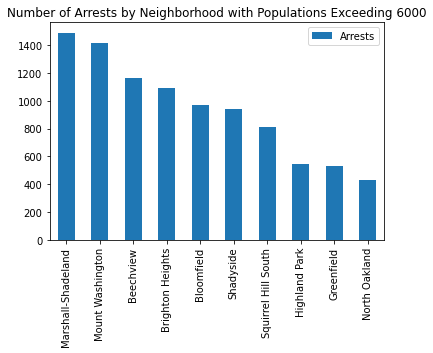

In [11]:
newarrests.plot(kind='bar', title= "Number of Arrests by Neighborhood with Populations Exceeding 6000")

## **Conclusion**
#### Based on the data collected from neighborhoods that exceeded a population of 6,000, North Oakland had the least number of arrests with 433 in total. Therefore, if we go off the data included within this threshold, North Oakland would be the safest neighborhood with respect to arrest records. 

#### This is arguably a more reaosnable conclusion to make than the afermentioned Mt. Oliver, as this claim is based off of more populated data sets. Specifically, Mt. Oliver's low arrest record could be attributed to it's relatively low population. By removing it and other similarily low populated neighborhoods from the data set, a stronger conclusion could be drawn about the neighborhoods' correlations with total arrests.

#### One reason to suggest why North Oakland has such a low arrest record is because of its location with respect to other certain insitutions and landmarks. North Oakland is postioned around both the University of Pittsburgh and Carnegie Mellon. Since this neighborhood is mostly occupied by campuses, museums, and college residents, it can be inferred that this academic hub would have lower arrests, when compared to an area that is not around such important locations.